<a href="https://colab.research.google.com/github/nourhan412/Task3-Technocolabs-project/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Libraries :**

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Retrieve Data :**

In [128]:
data=pd.read_csv("/content/drive/MyDrive/Project/prosperLoanData.csv")
data.head()  #get the first five rows of the data

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


# **Data Manipulation:**

In [129]:
print(data.shape) #number of rows and columns
data.columns

(113937, 81)


Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [130]:
data.describe() # an abbreviation about the numeric data

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [131]:
data.info()   #some informations about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [132]:
data.duplicated().sum() #check the duplicates

0

# **Handling Dates:**

In [133]:
data['ListingCreationDate'] = pd.to_datetime(data['ListingCreationDate'], infer_datetime_format=True)
data['LoanOriginationDate']=pd.to_datetime(data['LoanOriginationDate'], infer_datetime_format=True)
data['ClosedDate']=pd.to_datetime(data['ClosedDate'], infer_datetime_format=True)
data['DateCreditPulled']=pd.to_datetime(data['DateCreditPulled'], infer_datetime_format=True)
data['FirstRecordedCreditLine']=pd.to_datetime(data['FirstRecordedCreditLine'], infer_datetime_format=True)

In [134]:
data['FirstRecordedCreditLineDateDay'] = data['FirstRecordedCreditLine'].dt.day
data['FirstRecordedCreditLineDateMonth'] = data['FirstRecordedCreditLine'].dt.month
data['FirstRecordedCreditLineDateYear'] = data['FirstRecordedCreditLine'].dt.year
data.drop('FirstRecordedCreditLine',axis=1, inplace= True)

In [135]:
data['DateCreditPulledDay'] = data['DateCreditPulled'].dt.day
data['DateCreditPulledMonth'] = data['DateCreditPulled'].dt.month
data['DateCreditPulledYear'] = data['DateCreditPulled'].dt.year
data.drop('DateCreditPulled',axis=1, inplace= True)

In [136]:
data['ClosedDateDay'] = data['ClosedDate'].dt.day
data['ClosedDateMonth'] = data['ClosedDate'].dt.month
data['ClosedDateYear'] = data['ClosedDate'].dt.year
data.drop('ClosedDate',axis=1, inplace= True)

In [137]:
data['LoanOriginationDateDay'] = data['LoanOriginationDate'].dt.day
data['LoanOriginationDateMonth'] = data['LoanOriginationDate'].dt.month
data['LoanOriginationDateYear'] = data['LoanOriginationDate'].dt.year
data.drop('LoanOriginationDate',axis=1, inplace= True)

In [138]:
data['ListingCreationDateDay'] = data['ListingCreationDate'].dt.day
data['ListingCreationDateMonth'] = data['ListingCreationDate'].dt.month
data['ListingCreationDateYear'] = data['ListingCreationDate'].dt.year
data.drop('ListingCreationDate',axis=1, inplace= True)

In [139]:
data.shape

(113937, 91)

# **Split data into 2 parts (Bfore JUL 2009 and After) :**

In [140]:
dataAfter=data[(data['ListingCreationDateYear']>2009)|((data['ListingCreationDateYear']==2009) &(data['ListingCreationDateYear']>6))]
dataBefore=data[(data['ListingCreationDateYear']<2009)|((data['ListingCreationDateYear']==2009) &(data['ListingCreationDateYear']<=6))]

In [141]:
dataAfter.ListingCreationDateYear.unique()

array([2014, 2012, 2013, 2010, 2011, 2009])

In [142]:
dataBefore.ListingCreationDateYear.unique()

array([2007, 2006, 2008, 2005])

In [143]:
dataBefore

,ListingKey,ListingNumber,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,DateCreditPulledYear,ClosedDateDay,ClosedDateMonth,ClosedDateYear,LoanOriginationDateDay,LoanOriginationDateMonth,LoanOriginationDateYear,ListingCreationDateDay,ListingCreationDateMonth,ListingCreationDateYear
0,1021339766868145413AB3B,193129,C,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,...,2007,14.0,8.0,2009.0,12,9,2007,26,8,2007
2,0EE9337825851032864889A,81716,HR,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,...,2007,17.0,12.0,2009.0,17,1,2007,5,1,2007
11,0F1734025150298088A5F2B,213551,C,36,Completed,0.15033,0.1325,0.1225,NaN,NaN,...,2007,7.0,1.0,2008.0,18,10,2007,9,10,2007
17,0FDF336575182398852A8DC,31540,AA,36,Chargedoff,0.13202,0.1250,0.1175,NaN,NaN,...,2006,22.0,5.0,2008.0,22,8,2006,15,8,2006
21,1017340630713945364DA6B,241498,D,36,Completed,0.21488,0.2075,0.1975,NaN,NaN,...,2007,12.0,12.0,2010.0,12,12,2007,30,11,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113921,D21A33647075665665BE266,4,AA,36,Completed,NaN,0.0400,0.0350,NaN,NaN,...,2005,25.0,11.0,2005.0,15,11,2005,9,11,2005
113922,D2293427338962159DA5143,379986,C,36,Completed,0.15094,0.1295,0.1195,NaN,NaN,...,2008,19.0,8.0,2011.0,19,8,2008,8,8,2008
113923,E334343080922352965DF86,395877,B,36,Completed,0.22378,0.2089,0.1989,NaN,NaN,...,2008,23.0,9.0,2011.0,23,9,2008,10,9,2008
113926,E34333654295683286C35C2,28121,E,36,Defaulted,0.29776,0.2900,0.2850,NaN,NaN,...,2006,6.0,9.0,2007.0,8,8,2006,1,8,2006


In [144]:
dataAfter

,ListingKey,ListingNumber,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,DateCreditPulledYear,ClosedDateDay,ClosedDateMonth,ClosedDateYear,LoanOriginationDateDay,LoanOriginationDateMonth,LoanOriginationDateYear,ListingCreationDateDay,ListingCreationDateMonth,ListingCreationDateYear
1,10273602499503308B223C1,1209647,NaN,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,...,2014,NaN,NaN,NaN,3,3,2014,27,2,2014
3,0EF5356002482715299901A,658116,NaN,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,...,2012,NaN,NaN,NaN,1,11,2012,22,10,2012
4,0F023589499656230C5E3E2,909464,NaN,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,...,2013,NaN,NaN,NaN,20,9,2013,14,9,2013
5,0F05359734824199381F61D,1074836,NaN,60,Current,0.15425,0.1314,0.1214,0.11567,0.0449,...,2013,NaN,NaN,NaN,24,12,2013,14,12,2013
6,0F0A3576754255009D63151,750899,NaN,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,...,2013,NaN,NaN,NaN,18,4,2013,12,4,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,NaN,36,Current,0.22354,0.1864,0.1764,0.16490,0.0699,...,2013,NaN,NaN,NaN,22,4,2013,14,4,2013
113933,E6DB353036033497292EE43,537216,NaN,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,0.10070,0.0200,...,2011,NaN,NaN,NaN,7,11,2011,3,11,2011
113934,E6E13596170052029692BB1,1069178,NaN,60,Current,0.23984,0.2150,0.2050,0.18828,0.1025,...,2013,NaN,NaN,NaN,23,12,2013,13,12,2013
113935,E6EB3531504622671970D9E,539056,NaN,60,Completed,0.28408,0.2605,0.2505,0.24450,0.0850,...,2011,13.0,8.0,2013.0,21,11,2011,14,11,2011


In [145]:
dataBefore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29056 entries, 0 to 113927
Data columns (total 91 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ListingKey                           29056 non-null  object 
 1   ListingNumber                        29056 non-null  int64  
 2   CreditGrade                          28940 non-null  object 
 3   Term                                 29056 non-null  int64  
 4   LoanStatus                           29056 non-null  object 
 5   BorrowerAPR                          29031 non-null  float64
 6   BorrowerRate                         29056 non-null  float64
 7   LenderYield                          29056 non-null  float64
 8   EstimatedEffectiveYield              0 non-null      float64
 9   EstimatedLoss                        0 non-null      float64
 10  EstimatedReturn                      0 non-null      float64
 11  ProsperRating (numeric)    

In [146]:
dataAfter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84881 entries, 1 to 113936
Data columns (total 91 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ListingKey                           84881 non-null  object 
 1   ListingNumber                        84881 non-null  int64  
 2   CreditGrade                          13 non-null     object 
 3   Term                                 84881 non-null  int64  
 4   LoanStatus                           84881 non-null  object 
 5   BorrowerAPR                          84881 non-null  float64
 6   BorrowerRate                         84881 non-null  float64
 7   LenderYield                          84881 non-null  float64
 8   EstimatedEffectiveYield              84853 non-null  float64
 9   EstimatedLoss                        84853 non-null  float64
 10  EstimatedReturn                      84853 non-null  float64
 11  ProsperRating (numeric)    

# **Create Target column:**

In [147]:
dataBefore['LoanStatus'].unique()

array(['Completed', 'Chargedoff', 'Defaulted', 'Cancelled'], dtype=object)

In [148]:
dataAfter['LoanStatus'].unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [149]:
def fun (row):
    if row['LoanStatus']=='Completed':
        return 1
    else:
        return 0
dataBefore['BorrowerStatus']=dataBefore.apply(lambda row:fun(row),axis=1)
dataAfter['BorrowerStatus']=dataAfter.apply(lambda row:fun(row),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [150]:
dataAfter['BorrowerStatus'].unique()

array([0, 1])

In [151]:
dataBefore['BorrowerStatus'].unique()

array([1, 0])

In [152]:
dataBefore.drop('LoanStatus',axis=1,inplace=True)
dataAfter.drop('LoanStatus',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# **Handling Missing values :**

# 1- Data Before

In [153]:
cols=list()
percent=list()
for col in range(dataBefore.shape[1]):
    if(dataBefore.isnull().sum()[col]>0):
        cols.append(dataBefore.columns[col])
        percent.append(dataBefore.isnull().sum()[col]/dataBefore.shape[0]*100)
merg={"column name":cols,"Percent %":percent}
output=pd.DataFrame(merg)
output

,column name,Percent %
0,CreditGrade,0.399229
1,BorrowerAPR,0.086041
2,EstimatedEffectiveYield,100.000000
3,EstimatedLoss,100.000000
4,EstimatedReturn,100.000000
5,ProsperRating (numeric),100.000000
6,ProsperRating (Alpha),100.000000
7,ProsperScore,100.000000
8,BorrowerState,18.980589
9,Occupation,7.760876


In [154]:
for x in range(len(output)):
  if output.loc[x,"Percent %"]>50.0:
    dataBefore.drop(output.iat[x,0],axis=1,inplace=True)
mis=dataBefore.isnull().sum()[dataBefore.isnull().sum() > 0]
mis

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


CreditGrade                            116
BorrowerAPR                             25
BorrowerState                         5515
Occupation                            2255
EmploymentStatus                      2255
EmploymentStatusDuration              7606
CreditScoreRangeLower                  591
CreditScoreRangeUpper                  591
CurrentCreditLines                    7604
OpenCreditLines                       7604
TotalCreditLinespast7years             697
InquiriesLast6Months                   697
TotalInquiries                        1159
CurrentDelinquencies                   697
AmountDelinquent                      7622
DelinquenciesLast7Years                990
PublicRecordsLast10Years               697
PublicRecordsLast12Months             7604
RevolvingCreditBalance                7604
BankcardUtilization                   7604
AvailableBankcardCredit               7544
TotalTrades                           7544
TradesNeverDelinquent (percentage)    7544
TradesOpene

In [155]:
for x in mis.index:
  if dataBefore[x].dtype =='object':
    dataBefore[x].replace(np.nan,str(dataBefore[x].mode()),inplace=True) 
  elif dataBefore[x].dtype == 'int64' or dataBefore[x].dtype == 'float64' :
     dataBefore[x].replace(np.nan,dataBefore[x].mean(),inplace=True)
dataBefore.isnull().sum()[dataBefore.isnull().sum() > 0].sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

# 2- Data After

In [156]:
cols=list()
percent=list()
for col in range(dataAfter.shape[1]):
    if(dataAfter.isnull().sum()[col]>0):
        cols.append(dataAfter.columns[col])
        percent.append(dataAfter.isnull().sum()[col]/dataAfter.shape[0]*100)
merg={"column name":cols,"Percent %":percent}
output=pd.DataFrame(merg)
output

,column name,Percent %
0,CreditGrade,99.984684
1,EstimatedEffectiveYield,0.032987
2,EstimatedLoss,0.032987
3,EstimatedReturn,0.032987
4,ProsperRating (numeric),0.032987
5,ProsperRating (Alpha),0.032987
6,ProsperScore,0.032987
7,Occupation,1.570434
8,EmploymentStatusDuration,0.022384
9,GroupKey,97.607238


In [157]:
for x in range(len(output)):
  if output.loc[x,"Percent %"]>50.0:
    dataAfter.drop(output.iat[x,0],axis=1,inplace=True)
mis=dataAfter.isnull().sum()[dataAfter.isnull().sum() > 0]
mis

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


EstimatedEffectiveYield       28
EstimatedLoss                 28
EstimatedReturn               28
ProsperRating (numeric)       28
ProsperRating (Alpha)         28
ProsperScore                  28
Occupation                  1333
EmploymentStatusDuration      19
DebtToIncomeRatio           7297
dtype: int64

In [158]:
for x in mis.index:
  if dataAfter[x].dtype =='object':
    dataAfter[x].replace(np.nan,str(dataAfter[x].mode()),inplace=True) 
  elif dataAfter[x].dtype == 'int64' or dataAfter[x].dtype == 'float64' :
     dataAfter[x].replace(np.nan,dataAfter[x].mean(),inplace=True)
dataAfter.isnull().sum()[dataAfter.isnull().sum() > 0].sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

# **Encode categories using OneHotEncoder :**

# 1- Data Before 

In [159]:
#Encoding
for col in range(dataBefore.shape[1]) :
    if dataBefore[dataBefore.columns[col]].dtype == 'object' :
        print(dataBefore.columns[col])

ListingKey
CreditGrade
BorrowerState
Occupation
EmploymentStatus
IncomeRange
LoanKey
LoanOriginationQuarter
MemberKey


In [160]:
for col in range(dataBefore.shape[1]) :
    if dataBefore[dataBefore.columns[col]].dtype == 'bool' :
        print(dataBefore.columns[col])

IsBorrowerHomeowner
CurrentlyInGroup
IncomeVerifiable


In [161]:
object_cols=['ListingKey','CreditGrade','BorrowerState','Occupation','EmploymentStatus','IncomeRange','LoanKey','LoanOriginationQuarter','MemberKey',
             'IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable']
for col in object_cols:
    print(f"{col}  {dataBefore[col].nunique()}")

ListingKey  29056
CreditGrade  9
BorrowerState  51
Occupation  67
EmploymentStatus  8
IncomeRange  8
LoanKey  29056
LoanOriginationQuarter  19
MemberKey  26479
IsBorrowerHomeowner  2
CurrentlyInGroup  2
IncomeVerifiable  2


In [162]:
dataBefore.drop(['ListingKey','LoanKey','MemberKey'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [163]:
object_cols=['BorrowerState','CreditGrade','Occupation','EmploymentStatus','IncomeRange','LoanOriginationQuarter',
             'IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable']
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
for col in range(len(object_cols)):
    tmp = onehotencoder.fit_transform(dataBefore[object_cols[col]].values.reshape(-1,1)).toarray()
    #To add this back into the original dataframe 
    OH_cols = pd.DataFrame(tmp, columns = [object_cols[col]+str(int(col)) for i in range(dataBefore[object_cols[col]].nunique())]) 
    # One-hot encoding removed index; put it back
    OH_cols.index = dataBefore.index
    # Remove categorical columns (will replace with one-hot encoding)
    num_cols = dataBefore.drop(object_cols[col], axis=1)
    # Add one-hot encoded columns to numerical features
    dataBefore = pd.concat([num_cols, OH_cols], axis=1)
dataBefore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29056 entries, 0 to 113927
Columns: 231 entries, ListingNumber to IncomeVerifiable8
dtypes: float64(210), int64(21)
memory usage: 51.4 MB


In [164]:
dataBefore

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,...,LoanOriginationQuarter5,LoanOriginationQuarter5,LoanOriginationQuarter5,LoanOriginationQuarter5,IsBorrowerHomeowner6,IsBorrowerHomeowner6,CurrentlyInGroup7,CurrentlyInGroup7,IncomeVerifiable8,IncomeVerifiable8
0,193129,36,0.165160,0.1580,0.1380,0,2.000000,640.000000,659.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,81716,36,0.282690,0.2750,0.2400,0,68.459347,480.000000,499.000000,9.561393,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
11,213551,36,0.150330,0.1325,0.1225,0,19.000000,640.000000,659.000000,2.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
17,31540,36,0.132020,0.1250,0.1175,0,68.459347,760.000000,779.000000,9.561393,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
21,241498,36,0.214880,0.2075,0.1975,0,36.000000,620.000000,639.000000,4.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113921,4,36,0.195965,0.0400,0.0350,0,68.459347,644.350606,663.350606,9.561393,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
113922,379986,36,0.150940,0.1295,0.1195,5,115.000000,640.000000,659.000000,8.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113923,395877,36,0.223780,0.2089,0.1989,1,83.000000,700.000000,719.000000,15.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113926,28121,36,0.297760,0.2900,0.2850,0,68.459347,540.000000,559.000000,9.561393,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [165]:
dataBefore.isnull().sum()[dataBefore.isnull().sum() > 0].sum()

0

# 2- Data After

In [166]:
#Encoding
for col in range(dataAfter.shape[1]) :
    if dataAfter[dataAfter.columns[col]].dtype == 'object' :
        print(dataAfter.columns[col])

ListingKey
ProsperRating (Alpha)
BorrowerState
Occupation
EmploymentStatus
IncomeRange
LoanKey
LoanOriginationQuarter
MemberKey


In [167]:
dataAfter.drop('ProsperRating (Alpha)',axis=1,inplace=True) # it represented in numeric at ProsperRating (numeric)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [168]:
for col in range(dataAfter.shape[1]) :
    if dataAfter[dataAfter.columns[col]].dtype == 'bool' :
        print(dataAfter.columns[col])

IsBorrowerHomeowner
CurrentlyInGroup
IncomeVerifiable


In [169]:
object_cols=['ListingKey','BorrowerState','Occupation','EmploymentStatus','IncomeRange','LoanKey','LoanOriginationQuarter','MemberKey',
             'IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable']
for col in object_cols:
    print(f"{col}  {dataAfter[col].nunique()}")

ListingKey  84010
BorrowerState  48
Occupation  68
EmploymentStatus  7
IncomeRange  7
LoanKey  84010
LoanOriginationQuarter  20
MemberKey  68999
IsBorrowerHomeowner  2
CurrentlyInGroup  2
IncomeVerifiable  2


In [170]:
dataAfter.drop(['ListingKey','LoanKey','MemberKey'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [171]:
object_cols=['BorrowerState','Occupation','EmploymentStatus','IncomeRange','LoanOriginationQuarter',
             'IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable']
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
for col in range(len(object_cols)):
    tmp = onehotencoder.fit_transform(dataAfter[object_cols[col]].values.reshape(-1,1)).toarray()
    #To add this back into the original dataframe 
    OH_cols = pd.DataFrame(tmp, columns = [object_cols[col]+str(int(col)) for i in range(dataAfter[object_cols[col]].nunique())]) 
    # One-hot encoding removed index; put it back
    OH_cols.index = dataAfter.index
    # Remove categorical columns (will replace with one-hot encoding)
    num_cols = dataAfter.drop(object_cols[col], axis=1)
    # Add one-hot encoded columns to numerical features
    dataAfter = pd.concat([num_cols, OH_cols], axis=1)
dataAfter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84881 entries, 1 to 113936
Columns: 221 entries, ListingNumber to IncomeVerifiable7
dtypes: float64(200), int64(21)
memory usage: 143.8 MB


In [172]:
dataAfter

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LoanOriginationQuarter4,LoanOriginationQuarter4,LoanOriginationQuarter4,LoanOriginationQuarter4,IsBorrowerHomeowner5,IsBorrowerHomeowner5,CurrentlyInGroup6,CurrentlyInGroup6,IncomeVerifiable7,IncomeVerifiable7
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5,1074836,60,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,10.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
6,750899,36,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [173]:
dataAfter.isnull().sum()[dataAfter.isnull().sum() > 0].sum()

0

# **Handling the outliers :**

# 1- Data Before

In [174]:
#Using IQR method:-
for col in dataBefore.columns:
  x=dataBefore[col]
  #print(f"{col} {x.dtypes}")
  Q1,Q3 = np.percentile(x, [25,75])
  IQR = Q3 - Q1
  upper = Q3+(1.5*IQR)
  lower = Q1-(1.5*IQR)
  dataBefore[col]= x[((x <= upper) | (x > lower))]
  dataBefore[col].replace(np.nan,dataBefore[col].mean(),inplace=True)

dataBefore

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,...,LoanOriginationQuarter5,LoanOriginationQuarter5,LoanOriginationQuarter5,LoanOriginationQuarter5,IsBorrowerHomeowner6,IsBorrowerHomeowner6,CurrentlyInGroup7,CurrentlyInGroup7,IncomeVerifiable8,IncomeVerifiable8
0,193129,36,0.165160,0.1580,0.1380,0,2.000000,640.000000,659.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,81716,36,0.282690,0.2750,0.2400,0,68.459347,480.000000,499.000000,9.561393,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
11,213551,36,0.150330,0.1325,0.1225,0,19.000000,640.000000,659.000000,2.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
17,31540,36,0.132020,0.1250,0.1175,0,68.459347,760.000000,779.000000,9.561393,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
21,241498,36,0.214880,0.2075,0.1975,0,36.000000,620.000000,639.000000,4.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113921,4,36,0.195965,0.0400,0.0350,0,68.459347,644.350606,663.350606,9.561393,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
113922,379986,36,0.150940,0.1295,0.1195,5,115.000000,640.000000,659.000000,8.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113923,395877,36,0.223780,0.2089,0.1989,1,83.000000,700.000000,719.000000,15.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113926,28121,36,0.297760,0.2900,0.2850,0,68.459347,540.000000,559.000000,9.561393,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [175]:
dataBefore.isnull().sum()[dataBefore.isnull().sum() > 0].sum()

0

# 2- Data After

In [176]:
#Using IQR method:-
for col in dataAfter.columns:
  x=dataAfter[col]
  #print(f"{col} {x.dtypes}")
  Q1,Q3 = np.percentile(x, [25,75])
  IQR = Q3 - Q1
  upper = Q3+(1.5*IQR)
  lower = Q1-(1.5*IQR)
  dataAfter[col]= x[((x <= upper) | (x > lower))]
  dataAfter[col].replace(np.nan,dataAfter[col].mean(),inplace=True)

dataAfter

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LoanOriginationQuarter4,LoanOriginationQuarter4,LoanOriginationQuarter4,LoanOriginationQuarter4,IsBorrowerHomeowner5,IsBorrowerHomeowner5,CurrentlyInGroup6,CurrentlyInGroup6,IncomeVerifiable7,IncomeVerifiable7
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5,1074836,60,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,10.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
6,750899,36,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [177]:
dataAfter.isnull().sum()[dataAfter.isnull().sum() > 0].sum()

0

# **Data Selection :**

# 1- Data Before

In [178]:
dataBefore.shape

(29056, 231)

In [179]:
dataBefore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29056 entries, 0 to 113927
Columns: 231 entries, ListingNumber to IncomeVerifiable8
dtypes: float64(210), int64(21)
memory usage: 51.4 MB


In [180]:
dataBefore.columns

Index(['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'ListingCategory (numeric)', 'EmploymentStatusDuration',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines',
       ...
       'LoanOriginationQuarter5', 'LoanOriginationQuarter5',
       'LoanOriginationQuarter5', 'LoanOriginationQuarter5',
       'IsBorrowerHomeowner6', 'IsBorrowerHomeowner6', 'CurrentlyInGroup7',
       'CurrentlyInGroup7', 'IncomeVerifiable8', 'IncomeVerifiable8'],
      dtype='object', length=231)

In [181]:
X = dataBefore.drop("BorrowerStatus",axis=1)
Y = dataBefore["BorrowerStatus"]
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_regression(X,Y,discrete_features='auto')
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = make_mi_scores(X, Y, discrete_features)
selected=mi_scores[:21]  # show a few features with their MI scores
selected

LoanCurrentDaysDelinquent          0.663552
LP_GrossPrincipalLoss              0.653474
LP_NetPrincipalLoss                0.625269
LP_CustomerPrincipalPayments       0.518385
LP_CustomerPayments                0.171929
LP_NonPrincipalRecoverypayments    0.084770
BorrowerAPR                        0.078572
BorrowerRate                       0.072239
LenderYield                        0.071899
ClosedDateYear                     0.062522
LP_CollectionFees                  0.062347
MonthlyLoanPayment                 0.062084
CreditScoreRangeUpper              0.038958
CreditScoreRangeLower              0.038818
CurrentDelinquencies               0.034398
LP_ServiceFees                     0.029642
InquiriesLast6Months               0.028628
TotalInquiries                     0.025800
CreditGrade1                       0.023179
AvailableBankcardCredit            0.021217
LP_InterestandFees                 0.017730
Name: MI Scores, dtype: float64

In [182]:
bestBefore=['LP_GrossPrincipalLoss','LoanCurrentDaysDelinquent','LP_NetPrincipalLoss','LP_CustomerPrincipalPayments' ,'LP_CustomerPayments','BorrowerStatus']
best_featuresBefore=dataBefore[bestBefore]
best_featuresBefore

,LP_GrossPrincipalLoss,LoanCurrentDaysDelinquent,LP_NetPrincipalLoss,LP_CustomerPrincipalPayments,LP_CustomerPayments,BorrowerStatus
0,0.00,0,0.00,9425.00,11396.14,1
2,0.00,0,0.00,3001.00,4186.63,1
11,0.00,0,0.00,1000.00,1011.65,1
17,6012.65,2239,6012.67,3987.33,5325.33,0
21,0.00,0,0.00,3000.00,4061.05,1
...,...,...,...,...,...,...
113921,0.00,0,0.00,1000.00,1000.89,1
113922,0.00,0,0.00,4999.98,6061.27,1
113923,0.00,0,0.00,7999.99,10830.39,1
113926,2536.11,230,2536.10,463.90,1005.76,0


In [183]:
dataBefore.drop(bestBefore,axis=1,inplace=True)

# 2- Data After

In [184]:
X = dataAfter.drop("BorrowerStatus",axis=1)
Y = dataAfter["BorrowerStatus"]
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_regression(X,Y,discrete_features='auto')
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = make_mi_scores(X, Y, discrete_features)
selected=mi_scores[:21]  # show a few features with their MI scores
selected

LP_CustomerPrincipalPayments    0.492575
LP_CustomerPayments             0.217355
LoanMonthsSinceOrigination      0.182422
LoanNumber                      0.181168
ListingNumber                   0.180963
EstimatedEffectiveYield         0.180731
BorrowerAPR                     0.180388
EstimatedReturn                 0.171055
DateCreditPulledYear            0.169467
LoanOriginationDateYear         0.168211
ListingCreationDateYear         0.166925
LenderYield                     0.158241
BorrowerRate                    0.157950
EstimatedLoss                   0.152178
MonthlyLoanPayment              0.125723
LP_ServiceFees                  0.083522
LP_InterestandFees              0.067010
Investors                       0.065091
LoanOriginalAmount              0.053035
EmploymentStatus2               0.045885
LoanOriginationQuarter4         0.041850
Name: MI Scores, dtype: float64

In [185]:
bestAfter=['LP_CustomerPrincipalPayments','LP_CustomerPayments','LoanNumber','ListingNumber' ,'LoanMonthsSinceOrigination','BorrowerStatus']
best_featuresAfter=dataAfter[bestAfter]
best_featuresAfter

,LP_CustomerPrincipalPayments,LP_CustomerPayments,LoanNumber,ListingNumber,LoanMonthsSinceOrigination,BorrowerStatus
1,0.00,0.0000,134815,1209647,0,0
3,4091.09,5143.2000,77296,658116,16,0
4,1563.22,2819.8500,102670,909464,6,0
5,351.89,679.3400,123257,1074836,3,0
6,604.25,1226.7000,88353,750899,11,0
...,...,...,...,...,...,...
113932,2238.38,3647.4000,88485,753087,11,0
113933,1997.16,2330.5500,55801,537216,28,0
113934,183.15,546.7000,123122,1069178,3,0
113935,15000.00,21122.5600,56401,539056,28,1


In [186]:
dataAfter.drop(bestAfter,axis=1,inplace=True)

# **Data Extraction using PCA :**

# 1- Data Before

In [187]:
# Standardize
X_scaled = (dataBefore - dataBefore.mean(axis=0)) / dataBefore.std(axis=0)
from sklearn.decomposition import PCA
# Create principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=dataBefore.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3
ListingNumber,0.252009,-0.134133,0.038829
Term,-0.003504,0.002707,0.002352
BorrowerAPR,-0.061340,-0.194241,0.289130
BorrowerRate,-0.070744,-0.182300,0.290436
LenderYield,-0.069706,-0.179152,0.287874
...,...,...,...
IsBorrowerHomeowner6,0.085846,0.169233,0.090699
CurrentlyInGroup7,0.108825,-0.027778,-0.063046
CurrentlyInGroup7,-0.108825,0.027778,0.063046
IncomeVerifiable8,0.039046,-0.014494,-0.032941


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd066f70590>,
      dtype=object)

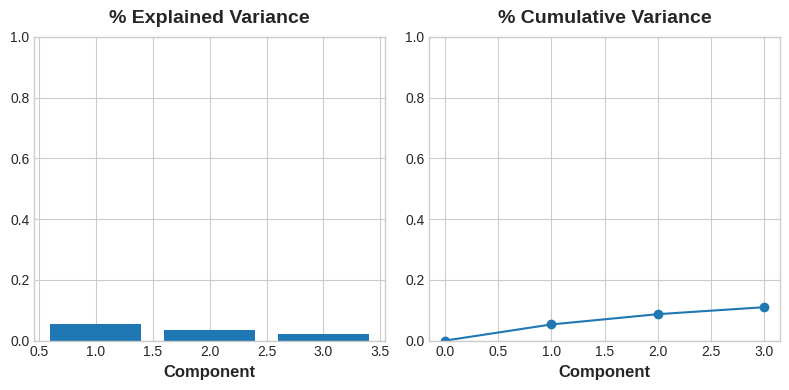

In [188]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs
plot_variance(pca)

In [189]:
dataBefore=pd.concat([best_featuresBefore,X_pca],axis=1)
dataBefore

,LP_GrossPrincipalLoss,LoanCurrentDaysDelinquent,LP_NetPrincipalLoss,LP_CustomerPrincipalPayments,LP_CustomerPayments,BorrowerStatus,PC1,PC2,PC3
0,0.00,0.0,0.0,9425.00,11396.14,1.0,-0.035816,0.115796,-1.974533
1,NaN,NaN,NaN,NaN,NaN,NaN,-4.038028,-2.024705,0.229771
2,0.00,0.0,0.0,3001.00,4186.63,1.0,-1.377778,-2.906215,-3.228698
3,NaN,NaN,NaN,NaN,NaN,NaN,-3.497906,4.999437,-0.449785
4,NaN,NaN,NaN,NaN,NaN,NaN,-0.989680,-2.957767,-0.698411
...,...,...,...,...,...,...,...,...,...
113921,0.00,0.0,0.0,1000.00,1000.89,1.0,NaN,NaN,NaN
113922,0.00,0.0,0.0,4999.98,6061.27,1.0,NaN,NaN,NaN
113923,0.00,0.0,0.0,7999.99,10830.39,1.0,NaN,NaN,NaN
113926,2536.11,230.0,2536.1,463.90,1005.76,0.0,NaN,NaN,NaN


In [190]:
dataBefore.isnull().sum()[dataBefore.isnull().sum() > 0].sum()

194553

In [191]:
cols=list()
percent=list()
for col in range(dataBefore.shape[1]):
    if(dataBefore.isnull().sum()[col]>0):
        cols.append(dataBefore.columns[col])
        percent.append(dataBefore.isnull().sum()[col]/dataBefore.shape[0]*100)
merg={"column name":cols,"Percent %":percent}
output=pd.DataFrame(merg)
output

,column name,Percent %
0,LP_GrossPrincipalLoss,42.659799
1,LoanCurrentDaysDelinquent,42.659799
2,LP_NetPrincipalLoss,42.659799
3,LP_CustomerPrincipalPayments,42.659799
4,LP_CustomerPayments,42.659799
5,BorrowerStatus,42.659799
6,PC1,42.659799
7,PC2,42.659799
8,PC3,42.659799


In [192]:
mis=dataBefore.isnull().sum()[dataBefore.isnull().sum() > 0]
for x in mis.index:
  if dataBefore[x].dtype =='object' or  x=='BorroweStatus':
    dataBefore[x].replace(np.nan,str(dataBefore[x].mode()),inplace=True) 
  elif dataBefore[x].dtype == 'int64' or dataBefore[x].dtype == 'float64' :
     dataBefore[x].replace(np.nan,dataBefore[x].mean(),inplace=True)
dataBefore.isnull().sum()[dataBefore.isnull().sum() > 0].sum()

0

In [193]:
dataBefore["BorrowerStatus"]=dataBefore["BorrowerStatus"].astype(bool)
dataBefore["BorrowerStatus"].unique()

array([ True, False])

# 2 - Data After

In [194]:
# Standardize
X_scaled = (dataAfter - dataAfter.mean(axis=0)) / dataAfter.std(axis=0)
from sklearn.decomposition import PCA
# Create principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=dataAfter.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3
Term,0.042421,-0.078017,0.015421
BorrowerAPR,-0.285909,-0.111016,0.104967
BorrowerRate,-0.285153,-0.101908,0.112834
LenderYield,-0.285147,-0.101957,0.112815
EstimatedEffectiveYield,-0.249069,-0.154260,0.083373
...,...,...,...
IsBorrowerHomeowner5,0.093115,-0.018989,0.177917
CurrentlyInGroup6,0.020022,-0.079633,-0.034889
CurrentlyInGroup6,-0.020022,0.079633,0.034889
IncomeVerifiable7,-0.052835,0.038988,0.005926


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd066f22a50>,
      dtype=object)

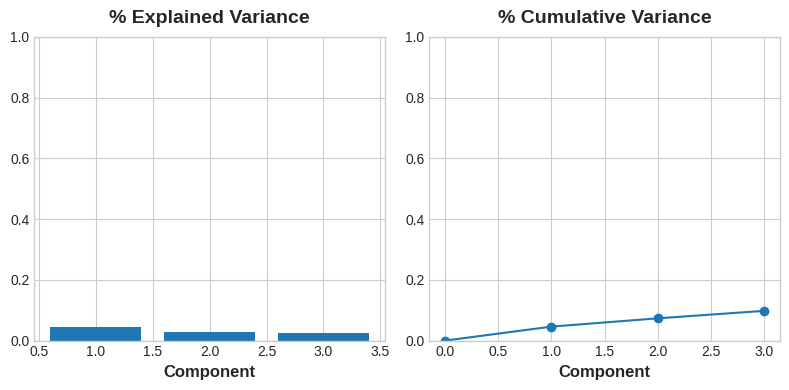

In [195]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs
plot_variance(pca)

In [196]:
dataAfter=pd.concat([best_featuresAfter,X_pca],axis=1)
dataAfter

,LP_CustomerPrincipalPayments,LP_CustomerPayments,LoanNumber,ListingNumber,LoanMonthsSinceOrigination,BorrowerStatus,PC1,PC2,PC3
0,NaN,NaN,NaN,NaN,NaN,NaN,3.673331,-2.190966,-2.271762
1,0.00,0.0000,134815.0,1209647.0,0.0,0.0,2.794474,3.529472,-1.272161
2,NaN,NaN,NaN,NaN,NaN,NaN,1.020789,-2.603145,2.570831
3,4091.09,5143.2000,77296.0,658116.0,16.0,0.0,5.504517,-1.173526,3.988764
4,1563.22,2819.8500,102670.0,909464.0,6.0,0.0,-3.217305,-1.992385,-2.354935
...,...,...,...,...,...,...,...,...,...
113932,2238.38,3647.4000,88485.0,753087.0,11.0,0.0,NaN,NaN,NaN
113933,1997.16,2330.5500,55801.0,537216.0,28.0,0.0,NaN,NaN,NaN
113934,183.15,546.7000,123122.0,1069178.0,3.0,0.0,NaN,NaN,NaN
113935,15000.00,21122.5600,56401.0,539056.0,28.0,1.0,NaN,NaN,NaN


In [197]:
dataAfter.isnull().sum()[dataAfter.isnull().sum() > 0].sum()

194796

In [198]:
cols=list()
percent=list()
for col in range(dataAfter.shape[1]):
    if(dataAfter.isnull().sum()[col]>0):
        cols.append(dataAfter.columns[col])
        percent.append(dataAfter.isnull().sum()[col]/dataAfter.shape[0]*100)
merg={"column name":cols,"Percent %":percent}
output=pd.DataFrame(merg)
output

,column name,Percent %
0,LP_CustomerPrincipalPayments,20.318235
1,LP_CustomerPayments,20.318235
2,LoanNumber,20.318235
3,ListingNumber,20.318235
4,LoanMonthsSinceOrigination,20.318235
5,BorrowerStatus,20.318235
6,PC1,20.318235
7,PC2,20.318235
8,PC3,20.318235


In [199]:
mis=dataAfter.isnull().sum()[dataAfter.isnull().sum() > 0]
for x in mis.index:
  if dataAfter[x].dtype =='object' or  x=='BorroweStatus':
    dataAfter[x].replace(np.nan,str(dataAfter[x].mode()),inplace=True) 
  elif dataAfter[x].dtype == 'int64' or dataAfter[x].dtype == 'float64' :
     dataAfter[x].replace(np.nan,dataAfter[x].mean(),inplace=True)
dataAfter.isnull().sum()[dataAfter.isnull().sum() > 0].sum()

0

In [200]:
dataAfter["BorrowerStatus"]=dataAfter["BorrowerStatus"].astype(bool)
dataAfter["BorrowerStatus"].unique()

array([ True, False])

# **Handling the balance of data :**

# 1 - Data Before

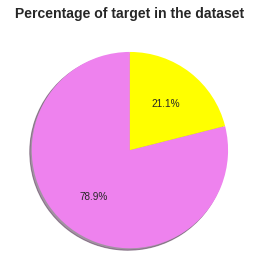

In [201]:
from matplotlib import pyplot as plt
sizes = dataBefore['BorrowerStatus'].value_counts(sort = True)
colors = ["violet","yellow"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [202]:
dataBefore['BorrowerStatus'].value_counts()

True     40002
False    10671
Name: BorrowerStatus, dtype: int64

In [203]:
from imblearn.under_sampling import RandomUnderSampler
X =dataBefore
X.drop('BorrowerStatus',axis=1) 
y = dataBefore['BorrowerStatus'] 
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rusB, y_rusB = rus.fit_resample(X, y)


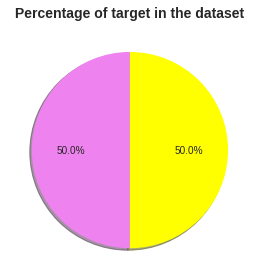

In [204]:
from matplotlib import pyplot as plt
sizes = y_rusB.value_counts(sort = True)
colors = ["violet","yellow"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

# 2 - Data After

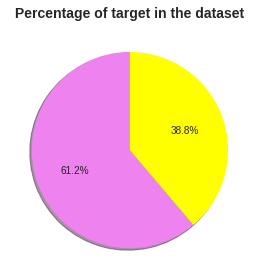

In [205]:
from matplotlib import pyplot as plt
sizes = dataAfter['BorrowerStatus'].value_counts(sort = True)
colors = ["violet","yellow"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [206]:
dataAfter['BorrowerStatus'].value_counts()

False    65192
True     41333
Name: BorrowerStatus, dtype: int64

In [207]:
from imblearn.under_sampling import RandomUnderSampler
X =dataAfter
X.drop('BorrowerStatus',axis=1) 
y = dataAfter['BorrowerStatus'] 
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rusA, y_rusA = rus.fit_resample(X, y)


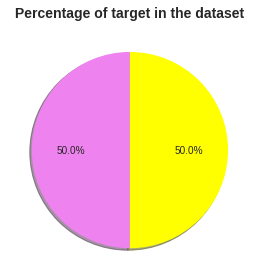

In [208]:
from matplotlib import pyplot as plt
sizes = y_rusA.value_counts(sort = True)
colors = ["violet","yellow"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

# **K-Nearest Neighbors (KNN) Model with imbalanced data:**

# 1 - Data Before 

In [245]:
from sklearn.model_selection import train_test_split
X =dataBefore
X.drop('BorrowerStatus',axis=1) 
y = dataBefore['BorrowerStatus'] 
X_train,test_X,y_train,test_y = train_test_split(X,y)

In [246]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=40,leaf_size=50, p=100,n_jobs=40)
model.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=50, n_jobs=40, n_neighbors=40, p=100)

In [247]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(y_train,y_pred))

Prediction: [False  True  True  True  True]
Accuracy:  0.9947373960635723


In [248]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_X)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(test_y,y_pred))

Prediction: [False  True  True  True  True]
Accuracy:  0.9934485752624517


# 2 - Data After

In [249]:
from sklearn.model_selection import train_test_split
X =dataAfter
X.drop('BorrowerStatus',axis=1) 
y = dataAfter['BorrowerStatus'] 
X_train,test_X,y_train,test_y = train_test_split(X,y)

In [250]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10,leaf_size=15, p=10,n_jobs=10)
model.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=15, n_jobs=10, n_neighbors=10, p=10)

In [251]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(y_train,y_pred))

Prediction: [ True  True False False False]
Accuracy:  0.9480054572991375


In [252]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_X)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(test_y,y_pred))

Prediction: [ True False False False False]
Accuracy:  0.935566236106939


# **K-Nearest Neighbors (KNN) Model with balanced data:**

# 1 - Data Before

In [253]:
from sklearn.model_selection import train_test_split
X =dataBefore
X.drop('BorrowerStatus',axis=1) 
y = dataBefore['BorrowerStatus'] 
X_train,test_X,y_train,test_y = train_test_split(x_rusB,y_rusB)

In [254]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=40,leaf_size=50, p=100,n_jobs=40)
model.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=50, n_jobs=40, n_neighbors=40, p=100)

In [255]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(y_train,y_pred))

Prediction: [False False  True False False]
Accuracy:  0.9846932400349869


In [256]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_X)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(test_y,y_pred))

Prediction: [False  True False False  True]
Accuracy:  0.9857571214392804


# 2 - Data After

In [257]:
from sklearn.model_selection import train_test_split
X =dataAfter
X.drop('BorrowerStatus',axis=1) 
y = dataAfter['BorrowerStatus'] 
X_train,test_X,y_train,test_y = train_test_split(x_rusA,y_rusA)

In [258]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10,leaf_size=15, p=10,n_jobs=10)
model.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=15, n_jobs=10, n_neighbors=10, p=10)

In [259]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(y_train,y_pred))

Prediction: [False False  True False  True]
Accuracy:  0.9503056500911305


In [260]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_X)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(test_y,y_pred))

Prediction: [False  True False False False]
Accuracy:  0.9390332413993323


# **Decision Trees Model on imbalanced data :**

# 1 - Data Before

In [261]:
from sklearn.model_selection import train_test_split
X =dataBefore
X.drop('BorrowerStatus',axis=1) 
y = dataBefore['BorrowerStatus'] 
X_train,test_X,y_train,test_y = train_test_split(X,y)

In [262]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(min_weight_fraction_leaf=0.3)
model.fit(X_train,y_train)

DecisionTreeClassifier(min_weight_fraction_leaf=0.3)

In [263]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(y_train,y_pred))

Prediction: [ True  True False  True  True]
Accuracy:  0.8137827597095043


In [264]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_X)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(test_y,y_pred))

Prediction: [False False  True False  True]
Accuracy:  0.8156918462388507


# 2 - Data After

In [265]:
from sklearn.model_selection import train_test_split
X =dataAfter
X.drop('BorrowerStatus',axis=1) 
y = dataAfter['BorrowerStatus'] 
X_train,test_X,y_train,test_y = train_test_split(X,y)

In [266]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(min_weight_fraction_leaf=0.4)
model.fit(X_train,y_train)

DecisionTreeClassifier(min_weight_fraction_leaf=0.4)

In [267]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(y_train,y_pred))

Prediction: [False False  True False False]
Accuracy:  0.8628415505738926


In [268]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_X)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(test_y,y_pred))

Prediction: [False False False False False]
Accuracy:  0.8583658756383298


# **Decision Trees Model on balanced data :**

# 1 - Data Before

In [269]:
from sklearn.model_selection import train_test_split
X =dataBefore
X.drop('BorrowerStatus',axis=1) 
y = dataBefore['BorrowerStatus'] 
X_train,test_X,y_train,test_y = train_test_split(x_rusB,y_rusB)

In [270]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(min_weight_fraction_leaf=0.5)
model.fit(X_train,y_train)

DecisionTreeClassifier(min_weight_fraction_leaf=0.5)

In [271]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(y_train,y_pred))

Prediction: [ True False  True  True False]
Accuracy:  0.8128826689991253


In [272]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_X)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(test_y,y_pred))

Prediction: [ True False False  True False]
Accuracy:  0.8204647676161919


# 2 - Data After

In [277]:
from sklearn.model_selection import train_test_split
X =dataAfter
X.drop('BorrowerStatus',axis=1) 
y = dataAfter['BorrowerStatus'] 
X_train,test_X,y_train,test_y = train_test_split(x_rusA,y_rusA)

In [282]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(min_weight_fraction_leaf=0.5)
model.fit(X_train,y_train)

DecisionTreeClassifier(min_weight_fraction_leaf=0.5)

In [283]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(y_train,y_pred))

Prediction: [False False False False False]
Accuracy:  0.500830658559009


In [284]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_X)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(test_y,y_pred))

Prediction: [False False False False False]
Accuracy:  0.49750810470798856


# **Done#**